In [11]:
result_file = 'result.csv'
model = 'house_16H_d10_l280_n559_20241009070539'

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv(result_file)
df = df[df['model'] == model]
df

,model,pruned,predicate,data,scale,threads,time
738,house_16H_d10_l280_n559_20241009070539,0,0.000000,house_16H,1G,1,0.576101
739,house_16H_d10_l280_n559_20241009070539,1,9.962608,house_16H,1G,1,0.492654
740,house_16H_d10_l280_n559_20241009070539,2,9.962608,house_16H,1G,1,0.495016
741,house_16H_d10_l280_n559_20241009070539,1,10.309411,house_16H,1G,1,0.505879
742,house_16H_d10_l280_n559_20241009070539,2,10.309411,house_16H,1G,1,0.508658
743,house_16H_d10_l280_n559_20241009070539,1,10.656214,house_16H,1G,1,0.503516
744,house_16H_d10_l280_n559_20241009070539,2,10.656214,house_16H,1G,1,0.505621
745,house_16H_d10_l280_n559_20241009070539,1,11.003016,house_16H,1G,1,0.516232
746,house_16H_d10_l280_n559_20241009070539,2,11.003016,house_16H,1G,1,0.512364
747,house_16H_d10_l280_n559_20241009070539,1,11.349819,house_16H,1G,1,0.503662


In [13]:
data = df[df['pruned'] == 0]['data'].values[0]
threads = df[df['pruned'] == 0]['threads'].values[0]
scale = df[df['pruned'] == 0]['scale'].values[0]


base_line = df[df['pruned'] == 0]['time'].values[0]
x = df[df['pruned'] == 1]['predicate'].values
y1 = df[df['pruned'] == 1]['time'].values
y2 = df[df['pruned'] == 2]['time'].values

(0.0, 0.5884795473888517)

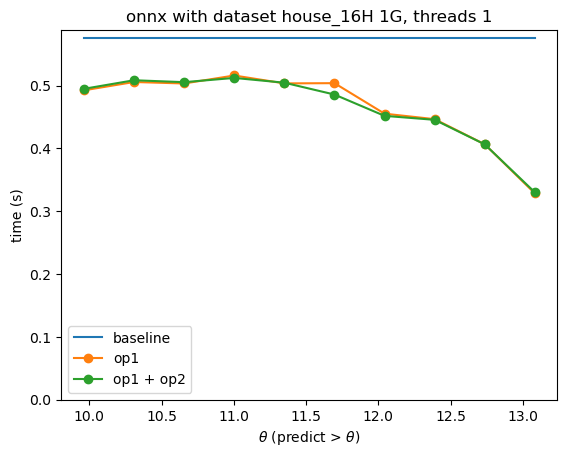

In [14]:
import matplotlib.pyplot as plt

plt.plot(x, [base_line for _ in range(len(x))], label='baseline')
plt.plot(x, y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, y2, marker='o', label='op1 + op2')
plt.title(f'onnx with dataset {data} {scale}, threads {threads}')
plt.ylabel('time (s)')
plt.xlabel('$\\theta$ (predict > $\\theta$)')
plt.legend()
plt.ylim(0)

(0.0, 1.7912812790172903)

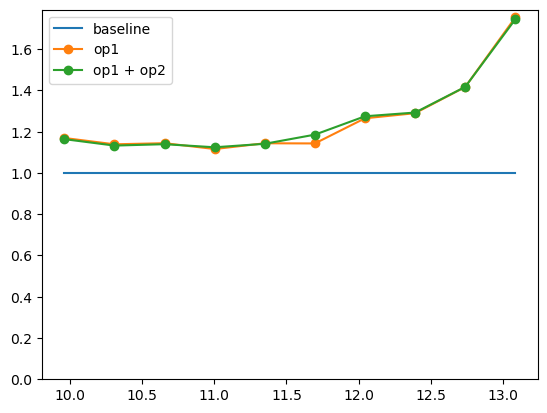

In [15]:
plt.plot(x, [1 for _ in range(len(x))], label='baseline')
plt.plot(x, base_line / y1, marker='o', label='op1')
if len(y2) > 0:
    plt.plot(x, base_line / y2, marker='o', label='op1 + op2')
plt.legend()
plt.ylim(0)